In [3]:
import pandas as pd


In [140]:
raw_data = pd.read_csv('data_counsel_chat_with_dolly_answers.csv')
options = ['anxiety', 'depression', 'stress'] 

In [141]:
df = raw_data[raw_data['topic'].isin(options)] 
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split,dollyAnswerText
0,0,0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train,"First of all, please seek professional help. I..."
1,1,1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train,"First, you need to find someone who will list..."
2,2,2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train,The first step is acknowledging that you have ...
3,3,3,3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train,"I don't know if you've considered it, but you'..."
4,4,4,4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train,Write down all of the things you think and fee...


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0.2     586 non-null    int64 
 1   Unnamed: 0.1     586 non-null    int64 
 2   Unnamed: 0       586 non-null    int64 
 3   questionID       586 non-null    int64 
 4   questionTitle    586 non-null    object
 5   questionText     586 non-null    object
 6   questionLink     586 non-null    object
 7   topic            586 non-null    object
 8   therapistInfo    586 non-null    object
 9   therapistURL     586 non-null    object
 10  answerText       586 non-null    object
 11  upvotes          586 non-null    int64 
 12  views            586 non-null    int64 
 13  split            586 non-null    object
 14  dollyAnswerText  586 non-null    object
dtypes: int64(6), object(9)
memory usage: 68.8+ KB


In [143]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import unicodedata

answer_text = df['answerText']
dolly_answer_text =  df['dollyAnswerText']
question_text = df['questionText']

ifidf_vectorizer = TfidfVectorizer()
ifidf_vectorizer.fit(pd.concat([answer_text, dolly_answer_text, question_text]))
answer_matrix = ifidf_vectorizer.transform(answer_text)
dolly_anwser_matrix = ifidf_vectorizer.transform(dolly_answer_text)
question_matrix = ifidf_vectorizer.transform(question_text)
answer_matrix, dolly_anwser_matrix, question_matrix

(<586x8075 sparse matrix of type '<class 'numpy.float64'>'
 	with 58575 stored elements in Compressed Sparse Row format>,
 <586x8075 sparse matrix of type '<class 'numpy.float64'>'
 	with 36871 stored elements in Compressed Sparse Row format>,
 <586x8075 sparse matrix of type '<class 'numpy.float64'>'
 	with 21745 stored elements in Compressed Sparse Row format>)

In [144]:
from sklearn.metrics.pairwise import cosine_similarity
df['cosineSimilarityDollyCounselor'] = list(map(lambda pair: cosine_similarity(pair[0], pair[1])[0][0], zip(answer_matrix, dolly_anwser_matrix)))
df['cosineSimilarityDollyQuestion'] = list(map(lambda pair: cosine_similarity(pair[0], pair[1])[0][0], zip(question_matrix, dolly_anwser_matrix)))
df['cosineSimilarityCounselorQuestion'] = list(map(lambda pair: cosine_similarity(pair[0], pair[1])[0][0], zip(answer_matrix, question_matrix)))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.2                       586 non-null    int64  
 1   Unnamed: 0.1                       586 non-null    int64  
 2   Unnamed: 0                         586 non-null    int64  
 3   questionID                         586 non-null    int64  
 4   questionTitle                      586 non-null    object 
 5   questionText                       586 non-null    object 
 6   questionLink                       586 non-null    object 
 7   topic                              586 non-null    object 
 8   therapistInfo                      586 non-null    object 
 9   therapistURL                       586 non-null    object 
 10  answerText                         586 non-null    object 
 11  upvotes                            586 non-null    int64  

In [145]:
df.to_csv("dolly_answers_similarity.csv")

()

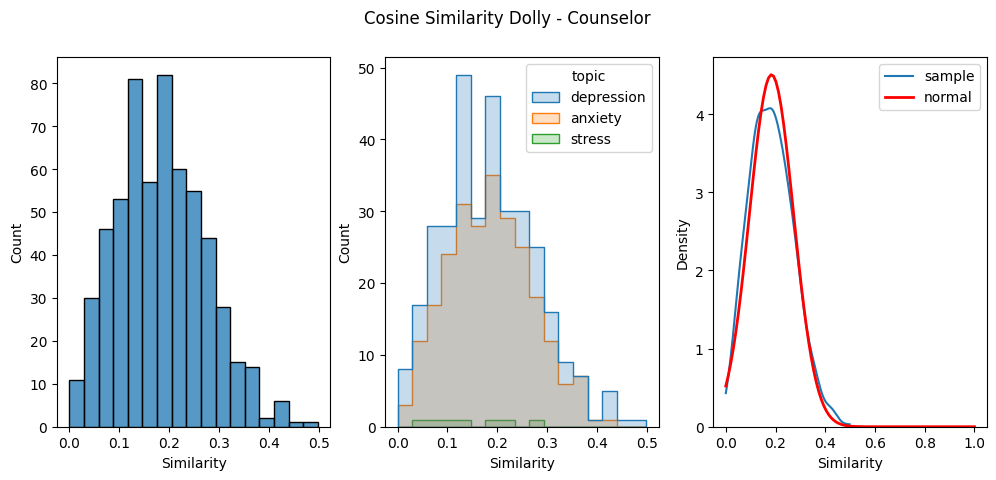

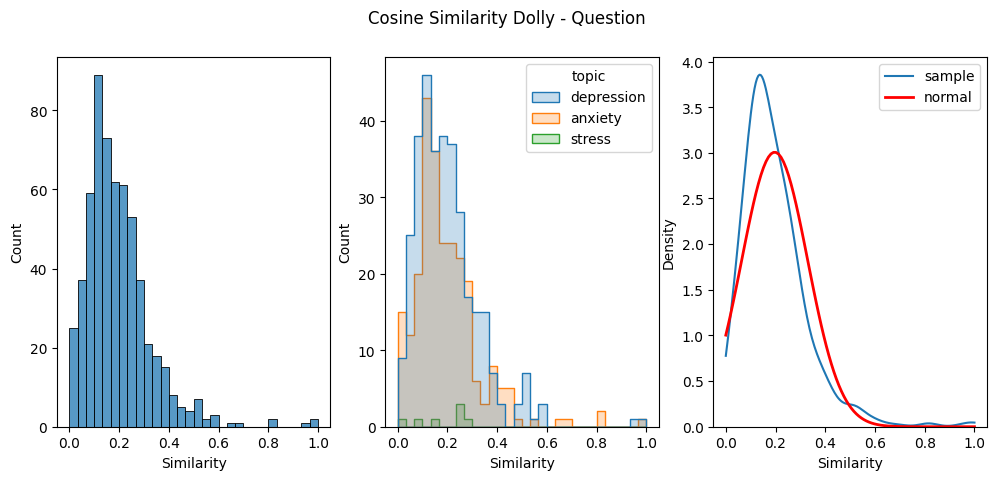

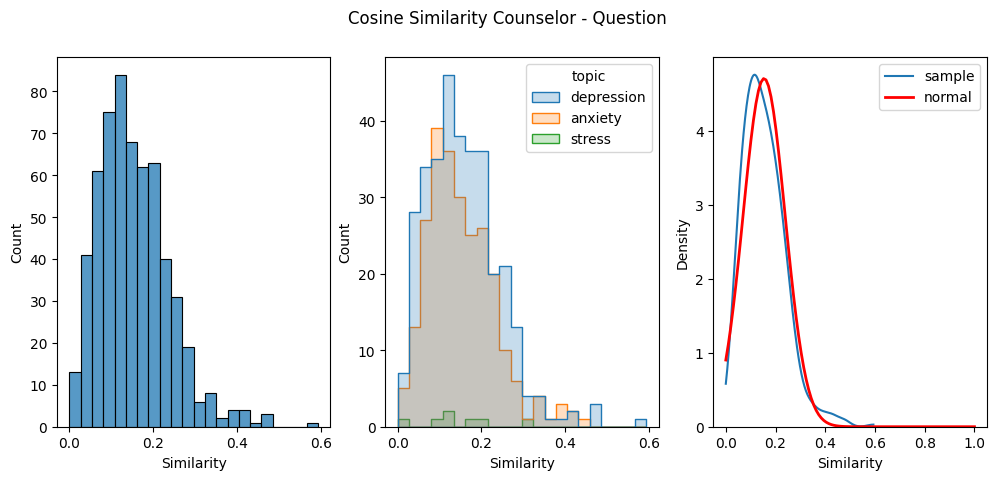

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def dist_plots(x_vals, title):
    fig, axs = plt.subplots(ncols=3)
    fig.set_figwidth(12)
    sns.histplot(df, x=x_vals, ax = axs[0]).set(xlabel="Similarity")
    sns.histplot(df, x=x_vals, hue="topic",  element="step", ax = axs[1]).set(xlabel="Similarity")
    sns.kdeplot(df, x=x_vals, ax = axs[2], label="sample", cut=0).set(xlabel="Similarity")
    x_norm = np.linspace(0, 1 , 100)
    y_norm = stats.norm.pdf(x_norm, df[x_vals].mean(), df[x_vals].std())
    axs[2].plot(x_norm, y_norm, 'r', lw=2, label='normal')   
    axs[2].legend()
    fig.suptitle(title)
    return fig

dist_plots("cosineSimilarityDollyCounselor", "Cosine Similarity Dolly - Counselor") \
    .savefig("cosine_similarity_dolly_counselor.png")
dist_plots("cosineSimilarityDollyQuestion", "Cosine Similarity Dolly - Question")  \
#    .savefig("cosine_similarity_dolly_question.png")
dist_plots("cosineSimilarityCounselorQuestion", "Cosine Similarity Counselor - Question")   \
#     .savefig("cosine_similarity_counselor_question.png")
()

In [147]:
df['cosineSimilarityDollyCounselor'].describe()

count    586.000000
mean       0.183841
std        0.088514
min        0.000000
25%        0.119978
50%        0.179327
75%        0.243396
max        0.498045
Name: cosineSimilarityDollyCounselor, dtype: float64

In [148]:
df['cosineSimilarityDollyQuestion'].describe()

count    586.000000
mean       0.196589
std        0.132680
min        0.000000
25%        0.111380
50%        0.168680
75%        0.254322
max        1.000000
Name: cosineSimilarityDollyQuestion, dtype: float64

In [149]:
df['cosineSimilarityCounselorQuestion'].describe()

count    586.000000
mean       0.153991
std        0.084697
min        0.000000
25%        0.091226
50%        0.143541
75%        0.204706
max        0.593549
Name: cosineSimilarityCounselorQuestion, dtype: float64

In [138]:
ifidf_vectorizer.fit(dolly_answer_text)
len(ifidf_vectorizer.vocabulary_)

3958

In [139]:
ifidf_vectorizer.fit(answer_text)
len(ifidf_vectorizer.vocabulary_)

6641